In [1]:
# import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from keras.models import Sequential
from keras import models, layers
import keras
import matplotlib.pyplot as plt


Using TensorFlow backend.


In [2]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 8350943381992919295
]


In [3]:
data = pd.read_csv("temp_matrix (25).csv")
#check the data types
data.dtypes

timestamp        int64
date            object
time            object
day             object
irradiance     float64
temperature    float64
0              float64
1              float64
2              float64
3              float64
4              float64
5              float64
6              float64
7              float64
8              float64
9              float64
10             float64
11             float64
12             float64
13             float64
14             float64
15             float64
16             float64
17             float64
18             float64
19             float64
20             float64
21             float64
22             float64
23             float64
24             float64
25             float64
26             float64
27             float64
28             float64
29             float64
30             float64
31             float64
pmax           float64
SCC              int64
panel           object
dtype: object

In [4]:
#dusty data:
dusty = data[data.panel=='dusty']

#seperating data into frames:

#These are columns that don't need to be normalized
dusty1 = dusty[['timestamp','date','time','day','panel']]

#everything else that is a float or int (minus the timestamp column) does need to be normalized
dusty2 = dusty.select_dtypes(include = ['float64','int64'])
dusty2 = dusty2.drop(columns=['timestamp'])
dusty2

,irradiance,temperature,0,1,2,3,4,5,6,7,...,24,25,26,27,28,29,30,31,pmax,SCC
1,557.80,28.21,27.705,NaN,NaN,26.074,NaN,26.949,26.3620,NaN,...,NaN,25.648,25.880,NaN,20.549,NaN,NaN,25.961,7964.932,630
3,787.00,33.99,46.665,NaN,NaN,44.952,NaN,46.651,46.8200,NaN,...,NaN,47.396,48.307,NaN,0.000,NaN,NaN,45.714,40853.528,4447
5,916.77,32.31,51.571,NaN,NaN,50.763,NaN,51.238,52.0330,NaN,...,NaN,52.833,53.888,NaN,0.000,NaN,NaN,50.882,48581.400,5223
7,1033.98,34.46,55.550,NaN,NaN,53.838,NaN,54.083,54.5820,NaN,...,NaN,54.876,54.620,NaN,0.000,NaN,NaN,51.626,52712.484,5837
9,1030.84,35.25,54.839,NaN,NaN,52.371,NaN,52.890,52.9630,NaN,...,NaN,52.607,51.958,NaN,0.000,NaN,NaN,48.639,62129.308,5906
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3011,3.14,38.30,56.714,NaN,NaN,56.089,NaN,54.851,55.2430,NaN,...,NaN,54.383,54.065,NaN,52.932,NaN,NaN,51.983,22067.880,2611
3013,3.14,38.30,50.577,NaN,NaN,50.938,NaN,49.331,49.8450,NaN,...,NaN,49.208,49.596,NaN,47.563,NaN,NaN,47.101,15904.834,1721
3015,3.14,38.30,44.139,NaN,NaN,44.475,NaN,43.627,43.8820,NaN,...,NaN,43.363,43.519,NaN,0.000,NaN,NaN,42.301,7421.639,792
3017,3.14,38.30,38.558,NaN,NaN,38.739,NaN,38.527,38.6200,NaN,...,NaN,38.102,38.406,NaN,37.970,NaN,NaN,38.015,671.760,140


In [5]:
#these columns are broken sensors, need to be replaced with 0's:
#01,02,04,07,12,15,16,19,24,27,29,30

dusty2.update(dusty2[['1','2','4','7','12','15','16','19','24','27','29','30']].fillna(0))
dusty2.head()

,irradiance,temperature,0,1,2,3,4,5,6,7,...,24,25,26,27,28,29,30,31,pmax,SCC
1,557.80,28.21,27.705,0.0,0.0,26.074,0.0,26.949,26.362,0.0,...,0.0,25.648,25.880,0.0,20.549,0.0,0.0,25.961,7964.932,630
3,787.00,33.99,46.665,0.0,0.0,44.952,0.0,46.651,46.820,0.0,...,0.0,47.396,48.307,0.0,0.000,0.0,0.0,45.714,40853.528,4447
5,916.77,32.31,51.571,0.0,0.0,50.763,0.0,51.238,52.033,0.0,...,0.0,52.833,53.888,0.0,0.000,0.0,0.0,50.882,48581.400,5223
7,1033.98,34.46,55.550,0.0,0.0,53.838,0.0,54.083,54.582,0.0,...,0.0,54.876,54.620,0.0,0.000,0.0,0.0,51.626,52712.484,5837
9,1030.84,35.25,54.839,0.0,0.0,52.371,0.0,52.890,52.963,0.0,...,0.0,52.607,51.958,0.0,0.000,0.0,0.0,48.639,62129.308,5906


In [6]:
#replacing the remainder NaNs with meaningful values (not 0s)
#by default this will be a linear interpolation unless a different method is specified

new_dusty2 = dusty2.interpolate()
new_dusty2

,irradiance,temperature,0,1,2,3,4,5,6,7,...,24,25,26,27,28,29,30,31,pmax,SCC
1,557.80,28.21,27.705,0.0,0.0,26.074,0.0,26.949,26.3620,0.0,...,0.0,25.648,25.880,0.0,20.549,0.0,0.0,25.961,7964.932,630
3,787.00,33.99,46.665,0.0,0.0,44.952,0.0,46.651,46.8200,0.0,...,0.0,47.396,48.307,0.0,0.000,0.0,0.0,45.714,40853.528,4447
5,916.77,32.31,51.571,0.0,0.0,50.763,0.0,51.238,52.0330,0.0,...,0.0,52.833,53.888,0.0,0.000,0.0,0.0,50.882,48581.400,5223
7,1033.98,34.46,55.550,0.0,0.0,53.838,0.0,54.083,54.5820,0.0,...,0.0,54.876,54.620,0.0,0.000,0.0,0.0,51.626,52712.484,5837
9,1030.84,35.25,54.839,0.0,0.0,52.371,0.0,52.890,52.9630,0.0,...,0.0,52.607,51.958,0.0,0.000,0.0,0.0,48.639,62129.308,5906
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3011,3.14,38.30,56.714,0.0,0.0,56.089,0.0,54.851,55.2430,0.0,...,0.0,54.383,54.065,0.0,52.932,0.0,0.0,51.983,22067.880,2611
3013,3.14,38.30,50.577,0.0,0.0,50.938,0.0,49.331,49.8450,0.0,...,0.0,49.208,49.596,0.0,47.563,0.0,0.0,47.101,15904.834,1721
3015,3.14,38.30,44.139,0.0,0.0,44.475,0.0,43.627,43.8820,0.0,...,0.0,43.363,43.519,0.0,0.000,0.0,0.0,42.301,7421.639,792
3017,3.14,38.30,38.558,0.0,0.0,38.739,0.0,38.527,38.6200,0.0,...,0.0,38.102,38.406,0.0,37.970,0.0,0.0,38.015,671.760,140


In [7]:
#concatinating the dataframes:

dusty_df = pd.concat([dusty1, new_dusty2], axis=1)

In [8]:
#seperating the newly revised data into frames for the independent & dependent variables
#the colon indicates all rows, and '00':'31' indicates all the columns from 00 to 31

dusty_ind = dusty_df.loc[:,'0':'31'] 
dusty_dep = dusty_df.loc[:,'pmax']

#reshaping the independent dataframe into 2D
dusty_ind = dusty_ind.to_numpy() #converting it to a numpy array
dusty_ind[0].reshape(-1,4)

#   apply map function to iterate through every element
#dusty_ind1 = map(lambda x : x.reshape(-1,4), dusty_ind)

#   convert back to an array from list
#dusty_ind2 = list(dusty_ind1)
#dusty_ind2 = np.array(dusty_ind2)
print(dusty_ind.ndim)

#reshaping the dependent dataframes into 1D with the first value matching the first value of the 2D array
dusty_dep = dusty_dep.to_numpy() #converting it to a numpy array
dusty_dep = dusty_dep.reshape(-1,1)
print(dusty_dep.ndim)

2
2


In [9]:
#Splitting the data into the Training and the Testing set
X_train,X_test,y_train,y_test,=train_test_split(dusty_ind,dusty_dep,test_size=0.2,random_state=0)

In [10]:
print(X_train)

[[60.183  0.     0.    ...  0.     0.    58.815]
 [68.493  0.     0.    ...  0.     0.    63.699]
 [34.455  0.     0.    ...  0.     0.    34.69 ]
 ...
 [55.982  0.     0.    ...  0.     0.    57.771]
 [57.69   0.     0.    ...  0.     0.    51.42 ]
 [35.8    0.     0.    ...  0.     0.    35.61 ]]


In [11]:
#Feature scaleing using the fit transform function to calibrate the measurement so that the training and test data have a similar shape

#create MinMaxScaler objects
MinMaxScaler = preprocessing.MinMaxScaler(feature_range=(0,1))
X_train = MinMaxScaler.fit_transform(X_train)
X_test = MinMaxScaler.fit_transform(X_test)

y_train = MinMaxScaler.fit_transform(y_train)
y_test = MinMaxScaler.fit_transform(y_test)



In [12]:
X_train = X_train.reshape(X_train.shape[0], 8,4,1)
X_train.ndim

4

In [13]:
X_test = X_test.reshape(X_test.shape[0], 8,4,1)
X_test.ndim

4

In [14]:
y_train.ndim

2

In [15]:
y_test.ndim

2

In [16]:
#custome loss functions for r_square
def r_square(y_true, y_pred):
    from keras import backend as K
    SS_res =  K.sum(K.square(y_true - y_pred)) 
    SS_tot = K.sum(K.square(y_true - K.mean(y_true))) 
    return (1 - SS_res/(SS_tot + K.epsilon()))

def r_square_loss(y_true, y_pred):
    from keras import backend as K
    SS_res =  K.sum(K.square(y_true - y_pred)) 
    SS_tot = K.sum(K.square(y_true - K.mean(y_true))) 
    return 1 - ( 1 - SS_res/(SS_tot + K.epsilon()))

In [17]:
#Instantiate an empty model
model = Sequential()

# C1 Convolutional Layer
model.add(layers.Conv2D(6, kernel_size=(2, 2), strides=(1, 1), activation='relu', input_shape=(8,4,1), padding="same"))

# S2 Pooling Layer
#model.add(layers.AveragePooling2D(pool_size=(2, 2), strides=(1, 1), padding='valid'))

# C3 Convolutional Layer
model.add(layers.Conv2D(16, kernel_size=(2, 2), strides=(1, 1), activation='relu', padding='valid'))

# S4 Pooling Layer
#model.add(layers.AveragePooling2D(pool_size=(2, 2), strides=(1, 1), padding='valid'))

# C5 Fully Connected Convolutional Layer
model.add(layers.Conv2D(120, kernel_size=(2, 2), strides=(1, 1), activation='relu', padding='valid'))

#Flatten the CNN output so that we can connect it with fully connected layers
model.add(layers.Flatten())
    
# FC6 Fully Connected Layer
model.add(layers.Dense(84, activation='relu'))

#Output Layer with softmax activation
model.add(layers.Dense(1, activation='linear'))

# Compile the model
model.compile(loss='mean_squared_error', optimizer='adam', metrics=["mse",r_square])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 8, 4, 6)           30        
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 3, 16)          400       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 6, 2, 120)         7800      
_________________________________________________________________
flatten_1 (Flatten)          (None, 1440)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 84)                121044    
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 85        
Total params: 129,359
Trainable params: 129,359
Non-trainable params: 0
________________________________________________

In [24]:
hist = model.fit(x=X_train,y=y_train, epochs=100, batch_size= 10, validation_data=(X_test, y_test), verbose=1)

Train on 1208 samples, validate on 302 samples
Epoch 1/100
1208/1208 [==============================] - 0s 244us/step - loss: 0.0183 - mse: 0.0183 - val_loss: 0.0178 - val_mse: 0.0178
Epoch 2/100
1208/1208 [==============================] - 0s 153us/step - loss: 0.0177 - mse: 0.0177 - val_loss: 0.0243 - val_mse: 0.0243
Epoch 3/100
1208/1208 [==============================] - 0s 147us/step - loss: 0.0169 - mse: 0.0169 - val_loss: 0.0196 - val_mse: 0.0196
Epoch 4/100
1208/1208 [==============================] - 0s 144us/step - loss: 0.0164 - mse: 0.0164 - val_loss: 0.0213 - val_mse: 0.0213
Epoch 5/100
1208/1208 [==============================] - 0s 141us/step - loss: 0.0163 - mse: 0.0163 - val_loss: 0.0176 - val_mse: 0.0176
Epoch 6/100
1208/1208 [==============================] - 0s 140us/step - loss: 0.0157 - mse: 0.0157 - val_loss: 0.0219 - val_mse: 0.0219
Epoch 7/100
1208/1208 [==============================] - 0s 139us/step - loss: 0.0163 - mse: 0.0163 - val_loss: 0.0185 - val_mse: 0

1208/1208 [==============================] - 0s 146us/step - loss: 0.0109 - mse: 0.0109 - val_loss: 0.0154 - val_mse: 0.0154
Epoch 61/100
1208/1208 [==============================] - 0s 137us/step - loss: 0.0117 - mse: 0.0117 - val_loss: 0.0178 - val_mse: 0.0178
Epoch 62/100
1208/1208 [==============================] - 0s 141us/step - loss: 0.0110 - mse: 0.0110 - val_loss: 0.0148 - val_mse: 0.0148
Epoch 63/100
1208/1208 [==============================] - 0s 143us/step - loss: 0.0110 - mse: 0.0110 - val_loss: 0.0168 - val_mse: 0.0168
Epoch 64/100
1208/1208 [==============================] - 0s 137us/step - loss: 0.0114 - mse: 0.0114 - val_loss: 0.0165 - val_mse: 0.0165
Epoch 65/100
1208/1208 [==============================] - 0s 141us/step - loss: 0.0111 - mse: 0.0111 - val_loss: 0.0177 - val_mse: 0.0177
Epoch 66/100
1208/1208 [==============================] - 0s 147us/step - loss: 0.0106 - mse: 0.0106 - val_loss: 0.0175 - val_mse: 0.0175
Epoch 67/100
1208/1208 [=======================

In [25]:
test_score = model.evaluate(X_test, y_test)
print("Test loss {:.4f}, accuracy {:.2f}%".format(test_score[0], test_score[1] * 100))

302/302 [==============================] - 0s 26us/step
Test loss 0.0173, accuracy 1.73%


Text(0, 0.5, 'mse')

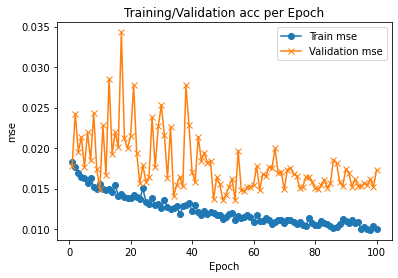

In [26]:
f, ax = plt.subplots()
ax.plot([None] + hist.history['mse'], 'o-')
ax.plot([None] + hist.history['val_mse'], 'x-')
# Plot legend and use the best location automatically: loc = 0.
ax.legend(['Train mse', 'Validation mse'], loc = 0)
ax.set_title('Training/Validation acc per Epoch')
ax.set_xlabel('Epoch')
ax.set_ylabel('mse')

Text(0, 0.5, 'Loss')

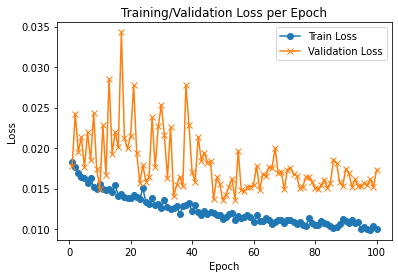

In [27]:
f, ax = plt.subplots()
ax.plot([None] + hist.history['loss'], 'o-')
ax.plot([None] + hist.history['val_loss'], 'x-')
# Plot legend and use the best location automatically: loc = 0.
ax.legend(['Train Loss', 'Validation Loss'], loc = 0)
ax.set_title('Training/Validation Loss per Epoch')
ax.set_xlabel('Epoch')
ax.set_ylabel('Loss')

In [28]:
#when you compile the model, add your custom loss function as a metric
model.compile(loss='mse', optimizer='adam', metrics=['mse'])

In [29]:
#plot from history
plt.plot(hist.history['r_square'])
plt.plot(hist.history['val_r_square'])
plt.title('R Square')
plt.ylabel('r_square')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')

KeyError: 'r_square'